# <div align="center">Freedom on the Move</div>

In [2]:
!pip install matplotlib seaborn pandas numpy 


     |████████████████████████████████| 11.6 MB 43 kB/s  eta 0:00:01
     |████████████████████████████████| 283 kB 29.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 30.6 MB/s eta 0:00:01
  Using cached Pillow-8.0.1-cp38-cp38-manylinux1_x86_64.whl (2.2 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached scipy-1.5.4-cp38-cp38-manylinux1_x86_64.whl (25.8 MB)
You should consider upgrading via the '/home/shayanriyaz/anaconda3/envs/BitUniversity/bin/python3.8 -m pip install --upgrade pip' command.


## Load Libraries

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Load Dataset

In [59]:
fotm_dataset = pd.read_csv('results.csv', encoding = "ISO-8859-1")
fotm_dataset

,advertisement.publication_date,advertisement.complete,advertiser.name,enslaved_person.gender,enslaved_person_languages.does_speak,enslaver.fullname,enslaver.gender,enslaver.type,newspaper.name,runaway.ran_before,...,newspaper.id,newspaper_location.id,runaway_event.id,runaway.id,enslaved_person.id,enslaved_person_languages.id,runaway_enslavers.id,enslaver.id,enslaver_location.id,runaway_reward.id
0,1829-12-19,True,NaN,FEMALE,NaN,Vance,OTHER,estate,Charleston Mercury,NaN,...,12d38785-dfdf-4dbc-a9c6-3ccb0e8d6448,0afd2704-9c29-4f31-9ffe-3627c61e7958,6bb670ae-7ec5-41e1-95b4-d4421015b17f,7c1d52e1-2b99-4372-a7c2-012430871cf1,664075ec-2c11-474e-b1ef-8ed120643658,NaN,dbe0cc3f-0898-4eaf-b702-8be2143d970a,577eef00-d0db-463d-8f5a-ca03282733f4,05a63752-e272-48f6-9050-72590c5d7ac9,30efbcb3-23c1-48f5-a349-c34daea5d1fb
1,1829-12-19,True,NaN,FEMALE,NaN,Vance,OTHER,estate,Charleston Mercury,NaN,...,12d38785-dfdf-4dbc-a9c6-3ccb0e8d6448,0afd2704-9c29-4f31-9ffe-3627c61e7958,6bb670ae-7ec5-41e1-95b4-d4421015b17f,7c1d52e1-2b99-4372-a7c2-012430871cf1,664075ec-2c11-474e-b1ef-8ed120643658,NaN,dbe0cc3f-0898-4eaf-b702-8be2143d970a,577eef00-d0db-463d-8f5a-ca03282733f4,05a63752-e272-48f6-9050-72590c5d7ac9,0d52b7d0-7bdd-48c6-acb0-ff3db30a16bb
2,1829-12-19,True,NaN,FEMALE,NaN,WM. H. Smith,MALE,current,Charleston Mercury,NaN,...,12d38785-dfdf-4dbc-a9c6-3ccb0e8d6448,0afd2704-9c29-4f31-9ffe-3627c61e7958,6bb670ae-7ec5-41e1-95b4-d4421015b17f,7c1d52e1-2b99-4372-a7c2-012430871cf1,664075ec-2c11-474e-b1ef-8ed120643658,NaN,d7796415-33de-4725-b41b-451b47ba7266,ea1637f3-cfd3-4aef-be71-3e090e8526e1,b7ef3786-2260-4cd1-afcf-14776d07af90,30efbcb3-23c1-48f5-a349-c34daea5d1fb
3,1829-12-19,True,NaN,FEMALE,NaN,WM. H. Smith,MALE,current,Charleston Mercury,NaN,...,12d38785-dfdf-4dbc-a9c6-3ccb0e8d6448,0afd2704-9c29-4f31-9ffe-3627c61e7958,6bb670ae-7ec5-41e1-95b4-d4421015b17f,7c1d52e1-2b99-4372-a7c2-012430871cf1,664075ec-2c11-474e-b1ef-8ed120643658,NaN,d7796415-33de-4725-b41b-451b47ba7266,ea1637f3-cfd3-4aef-be71-3e090e8526e1,b7ef3786-2260-4cd1-afcf-14776d07af90,0d52b7d0-7bdd-48c6-acb0-ff3db30a16bb
4,1830-01-02,True,"Wm. B. Roberts, Executor",MALE,NaN,Rev. Henry Holmes,MALE,deceased,Edenton Gazette And North Carolina General Adv...,NaN,...,ce244760-13c7-4c98-bfc5-0b6b8cb454f4,dd33c07c-80c1-4d46-b25b-1daf33b57a79,f6f30219-bf53-4835-b90b-68d587aef3ef,cf69ceec-0b4b-4b5c-98bf-bffab1e488c1,bb232988-8487-470f-bc62-d12aa8665d8d,NaN,3f39bcb6-873e-41ed-b8a2-5546d2117e22,ecb5b127-f7f4-4e7c-88fd-b325524a6853,d3cbbc85-a3df-4c44-b689-71693643a223,375fc31d-c80b-4fe5-a95d-728c1a0f96bf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9064,1844-01-12,False,Lucien Labranche,MALE,NaN,NaN,NaN,NaN,The Daily Picayune,NaN,...,c5993adc-4bee-4c12-a104-9bf7119308af,026f5472-34b7-4c69-aff8-9ae5cd62e07a,2f6dc910-1050-49dc-844f-0c8e043c75fd,1d83e9fa-3963-44a7-a53f-c8d9515ab2bb,a92afc5b-ea7b-4f6b-9e90-a5f9a645bd3a,NaN,NaN,NaN,NaN,NaN
9065,1825-08-03,False,NaN,NOT_PROVIDED,NaN,Fred Fraser Esq of Ashepoo,MALE,NOT_PROVIDED,Charleston Courier,NaN,...,7d2db9a0-67dc-4356-ad21-02fbd93cbb10,0afd2704-9c29-4f31-9ffe-3627c61e7958,fbf32ec3-f2b2-4a37-8dec-285a7c4f5dff,837adcad-b137-4541-bcdf-05d6fed53e43,a747822e-1534-411a-b196-b0c7e1a09309,NaN,983b23d6-c7a9-4c85-a3b7-6113d241757d,f79d6080-eb35-4cab-ada9-4f46c3ce6089,NaN,4f9f226d-ddad-4c5d-acbc-310dedc80cda
9066,1823-11-03,False,NaN,NaN,NaN,NaN,NaN,NaN,Charleston Courier,NaN,...,7d2db9a0-67dc-4356-ad21-02fbd93cbb10,0afd2704-9c29-4f31-9ffe-3627c61e7958,2aa79a98-8ce3-4720-a3d0-10b1707d41c6,2bfdf04f-2098-4a28-a746-a5db15da6b0b,277f0ea0-a0d5-4e3b-b6a0-d949134b7a8a,NaN,NaN,NaN,NaN,NaN
9067,1844-01-02,False,NaN,NaN,NaN,NaN,NaN,NaN,Milledgeville Federal Union,NaN,...,2b017d87-53a2-43b3-b27d-bbc507ea340b,507b5968-86b7-476e-a83d-a4307622ed57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 1

In [60]:
fotm_dataset.columns

Index(['advertisement.publication_date', 'advertisement.complete',
       'advertiser.name', 'enslaved_person.gender',
       'enslaved_person_languages.does_speak', 'enslaver.fullname',
       'enslaver.gender', 'enslaver.type', 'newspaper.name',
       'runaway.ran_before', 'runaway.profess_freedom',
       'runaway_enslavers.enslaver_status', 'runaway_reward.amount',
       'newspaper_location.city', 'newspaper_location.state',
       'enslaver_location.city', 'enslaver_location.state', 'advertisement.id',
       'advertiser.id', 'newspaper.id', 'newspaper_location.id',
       'runaway_event.id', 'runaway.id', 'enslaved_person.id',
       'enslaved_person_languages.id', 'runaway_enslavers.id', 'enslaver.id',
       'enslaver_location.id', 'runaway_reward.id'],
      dtype='object')

In [61]:
fotm_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9069 entries, 0 to 9068
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   advertisement.publication_date        9069 non-null   object 
 1   advertisement.complete                9069 non-null   bool   
 2   advertiser.name                       2549 non-null   object 
 3   enslaved_person.gender                7525 non-null   object 
 4   enslaved_person_languages.does_speak  1456 non-null   object 
 5   enslaver.fullname                     6886 non-null   object 
 6   enslaver.gender                       6938 non-null   object 
 7   enslaver.type                         6762 non-null   object 
 8   newspaper.name                        9069 non-null   object 
 9   runaway.ran_before                    391 non-null    object 
 10  runaway.profess_freedom               478 non-null    object 
 11  runaway_enslavers

In [62]:
fotm_dataset.describe(include='all')

,advertisement.publication_date,advertisement.complete,advertiser.name,enslaved_person.gender,enslaved_person_languages.does_speak,enslaver.fullname,enslaver.gender,enslaver.type,newspaper.name,runaway.ran_before,...,newspaper.id,newspaper_location.id,runaway_event.id,runaway.id,enslaved_person.id,enslaved_person_languages.id,runaway_enslavers.id,enslaver.id,enslaver_location.id,runaway_reward.id
count,9069,9069,2549,7525,1456,6886,6938,6762,9069,391,...,9069,9069,7817,7811,7811,1456,7109,7109,5515,5332
unique,3444,2,842,4,2,3138,4,6,157,2,...,162,50,3888,4680,4680,1068,5679,4206,2042,3842
top,1778-11-26,False,H. S. Harper,MALE,True,S. Bennet,MALE,current,The Daily Picayune,True,...,c5993adc-4bee-4c12-a104-9bf7119308af,026f5472-34b7-4c69-aff8-9ae5cd62e07a,87373ad7-17cf-405a-8f52-2d661cf79c0e,1d0a92b0-6dc9-4208-a0d5-bff39c87f18d,50d9db05-8e17-4962-ac68-b2e4fef7ff6a,3e010139-e340-4658-bdb4-4d7d8cf86249,78f8700f-1a65-4188-a430-3ec61d6ac188,85994a0a-51f2-442e-bffd-08a64e965a3f,026f5472-34b7-4c69-aff8-9ae5cd62e07a,e91d0d18-0ed7-4202-ab7f-78fa3aaae37c
freq,272,8204,126,5750,1357,36,5406,4627,2602,291,...,2602,3748,272,32,32,32,6,19,113,16
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Remove columns that have `id` in their name

In [63]:
columns_to_remove = ['runaway_reward.id','enslaver_location.id','enslaver.id','runaway_enslavers.id',
                    'enslaved_person_languages.id','enslaved_person.id','runaway.id','runaway_event.id',
                     'advertiser.id','newspaper_location.id','newspaper.id','advertisement.id'] # INSERT CODE HERE

In [64]:
fotm_dataset_without_id = fotm_dataset.drop(columns = columns_to_remove,
             axis = 0)

In [65]:
fotm_dataset_without_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9069 entries, 0 to 9068
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   advertisement.publication_date        9069 non-null   object 
 1   advertisement.complete                9069 non-null   bool   
 2   advertiser.name                       2549 non-null   object 
 3   enslaved_person.gender                7525 non-null   object 
 4   enslaved_person_languages.does_speak  1456 non-null   object 
 5   enslaver.fullname                     6886 non-null   object 
 6   enslaver.gender                       6938 non-null   object 
 7   enslaver.type                         6762 non-null   object 
 8   newspaper.name                        9069 non-null   object 
 9   runaway.ran_before                    391 non-null    object 
 10  runaway.profess_freedom               478 non-null    object 
 11  runaway_enslavers

In [66]:
fotm_dataset_without_id.isna().sum()

advertisement.publication_date             0
advertisement.complete                     0
advertiser.name                         6520
enslaved_person.gender                  1544
enslaved_person_languages.does_speak    7613
enslaver.fullname                       2183
enslaver.gender                         2131
enslaver.type                           2307
newspaper.name                             0
runaway.ran_before                      8678
runaway.profess_freedom                 8591
runaway_enslavers.enslaver_status       9069
runaway_reward.amount                   3737
newspaper_location.city                  110
newspaper_location.state                   0
enslaver_location.city                  5627
enslaver_location.state                 4089
dtype: int64

In [67]:
fotm_dataset_without_id

,advertisement.publication_date,advertisement.complete,advertiser.name,enslaved_person.gender,enslaved_person_languages.does_speak,enslaver.fullname,enslaver.gender,enslaver.type,newspaper.name,runaway.ran_before,runaway.profess_freedom,runaway_enslavers.enslaver_status,runaway_reward.amount,newspaper_location.city,newspaper_location.state,enslaver_location.city,enslaver_location.state
0,1829-12-19,True,NaN,FEMALE,NaN,Vance,OTHER,estate,Charleston Mercury,NaN,NaN,NaN,20.0,Charleston,US-SC,Charleston,US-SC
1,1829-12-19,True,NaN,FEMALE,NaN,Vance,OTHER,estate,Charleston Mercury,NaN,NaN,NaN,10.0,Charleston,US-SC,Charleston,US-SC
2,1829-12-19,True,NaN,FEMALE,NaN,WM. H. Smith,MALE,current,Charleston Mercury,NaN,NaN,NaN,20.0,Charleston,US-SC,Charleston,US-SC
3,1829-12-19,True,NaN,FEMALE,NaN,WM. H. Smith,MALE,current,Charleston Mercury,NaN,NaN,NaN,10.0,Charleston,US-SC,Charleston,US-SC
4,1830-01-02,True,"Wm. B. Roberts, Executor",MALE,NaN,Rev. Henry Holmes,MALE,deceased,Edenton Gazette And North Carolina General Adv...,NaN,NaN,NaN,15.0,Edenton,US-NC,NaN,US-NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9064,1844-01-12,False,Lucien Labranche,MALE,NaN,NaN,NaN,NaN,The Daily Picayune,NaN,NaN,NaN,NaN,New Orleans,US-LA,NaN,NaN
9065,1825-08-03,False,NaN,NOT_PROVIDED,NaN,Fred Fraser Esq of Ashepoo,MALE,NOT_PROVIDED,Charleston Courier,NaN,NaN,NaN,20.0,Charleston,US-SC,NaN,NaN
9066,1823-11-03,False,NaN,NaN,NaN,NaN,NaN,NaN,Charleston Courier,NaN,NaN,NaN,NaN,Charleston,US-SC,NaN,NaN
9067,1844-01-02,False,NaN,NaN,NaN,NaN,NaN,NaN,Milledgeville Federal Union,NaN,NaN,NaN,NaN,Milledgeville,US-GA,NaN,NaN


### Removing more columns that have a large quantities of null values.

In [68]:
fotm_dataset_without_id.isna().sum()

advertisement.publication_date             0
advertisement.complete                     0
advertiser.name                         6520
enslaved_person.gender                  1544
enslaved_person_languages.does_speak    7613
enslaver.fullname                       2183
enslaver.gender                         2131
enslaver.type                           2307
newspaper.name                             0
runaway.ran_before                      8678
runaway.profess_freedom                 8591
runaway_enslavers.enslaver_status       9069
runaway_reward.amount                   3737
newspaper_location.city                  110
newspaper_location.state                   0
enslaver_location.city                  5627
enslaver_location.state                 4089
dtype: int64

In [69]:
more_columns = ['advertiser.name', 'enslaved_person_languages.does_speak','enslaver.fullname',
                'runaway.ran_before', 'runaway.profess_freedom','runaway_enslavers.enslaver_status']

In [70]:
fotm_dataset_without_id= fotm_dataset_without_id.drop(columns = more_columns,axis=0)

## Step 3 - Further Cleaning

### Remove extra column

In [71]:
fotm_dataset_modified = fotm_dataset_without_id.copy(deep = True)

In [72]:
fotm_dataset_modified

,advertisement.publication_date,advertisement.complete,enslaved_person.gender,enslaver.gender,enslaver.type,newspaper.name,runaway_reward.amount,newspaper_location.city,newspaper_location.state,enslaver_location.city,enslaver_location.state
0,1829-12-19,True,FEMALE,OTHER,estate,Charleston Mercury,20.0,Charleston,US-SC,Charleston,US-SC
1,1829-12-19,True,FEMALE,OTHER,estate,Charleston Mercury,10.0,Charleston,US-SC,Charleston,US-SC
2,1829-12-19,True,FEMALE,MALE,current,Charleston Mercury,20.0,Charleston,US-SC,Charleston,US-SC
3,1829-12-19,True,FEMALE,MALE,current,Charleston Mercury,10.0,Charleston,US-SC,Charleston,US-SC
4,1830-01-02,True,MALE,MALE,deceased,Edenton Gazette And North Carolina General Adv...,15.0,Edenton,US-NC,NaN,US-NC
...,...,...,...,...,...,...,...,...,...,...,...
9064,1844-01-12,False,MALE,NaN,NaN,The Daily Picayune,NaN,New Orleans,US-LA,NaN,NaN
9065,1825-08-03,False,NOT_PROVIDED,MALE,NOT_PROVIDED,Charleston Courier,20.0,Charleston,US-SC,NaN,NaN
9066,1823-11-03,False,NaN,NaN,NaN,Charleston Courier,NaN,Charleston,US-SC,NaN,NaN
9067,1844-01-02,False,NaN,NaN,NaN,Milledgeville Federal Union,NaN,Milledgeville,US-GA,NaN,NaN


### Find unique and NaN strings  for each of the remaining columns

Replace string values that are inconsistent with 'Unknown'. Do the same for NaN values.

### ```enslaved_person.gender```

In [73]:
fotm_dataset_modified['enslaved_person.gender'].unique()

array(['FEMALE', 'MALE', nan, 'NOT_PROVIDED', 'OTHER'], dtype=object)

In [74]:
fotm_dataset_modified['enslaved_person.gender'].fillna(value='UNKNOWN', method=None, axis=None, inplace=True)

In [75]:
fotm_dataset_modified["enslaved_person.gender"].replace({"NOT_PROVIDED": "UNKNOWN"}, inplace=True)

In [76]:
fotm_dataset_modified['enslaved_person.gender'].unique()

array(['FEMALE', 'MALE', 'UNKNOWN', 'OTHER'], dtype=object)

### ```enslaver.gender```

In [77]:
fotm_dataset_modified['enslaver.gender'].unique()

array(['OTHER', 'MALE', 'NOT_PROVIDED', nan, 'FEMALE'], dtype=object)

In [78]:
fotm_dataset_modified['enslaver.gender'].fillna(value='UNKNOWN', method=None, axis=None, inplace=True)

In [79]:
fotm_dataset_modified["enslaver.gender"].replace({"NOT_PROVIDED": "UNKNOWN"}, inplace=True)

In [80]:
fotm_dataset_modified['enslaver.gender'].unique()

array(['OTHER', 'MALE', 'UNKNOWN', 'FEMALE'], dtype=object)

### ```enslaver.type```

In [81]:
fotm_dataset_modified['enslaver.type'].unique()

array(['estate', 'current', 'deceased', 'NOT_PROVIDED', 'former',
       'alleged', nan], dtype=object)

In [82]:
fotm_dataset_modified['enslaver.type'].fillna(value='UNKNOWN', method=None, axis=None, inplace=True)

In [83]:
fotm_dataset_modified["enslaver.type"].replace({"NOT_PROVIDED": "UNKNOWN"},
                                               inplace=True)

In [84]:
fotm_dataset_modified['enslaver.type'].unique()

array(['estate', 'current', 'deceased', 'UNKNOWN', 'former', 'alleged'],
      dtype=object)

### ```runaway_reward.amount```

One of these line following lines of code for this section is not necessary, find the line and comment it.

In [85]:
fotm_dataset_modified['runaway_reward.amount'].unique()

array([2.00e+01, 1.00e+01, 1.50e+01, 9.00e+01, 5.00e+01,      nan,
       1.00e+02, 2.00e+02, 2.00e+00, 2.50e+01, 4.00e+01, 8.00e+00,
       1.00e+00, 7.00e+01, 3.00e+01, 3.00e+00, 5.00e+00, 6.00e+00,
       4.00e+00, 2.50e+02, 7.50e+01, 5.00e+02, 3.00e+02, 1.50e+02,
       6.00e+01, 5.90e+01, 4.50e+01, 1.00e+03, 5.50e+01, 2.90e+01,
       8.20e+02, 2.30e+01, 4.00e+02, 3.50e+01, 2.10e+01, 3.00e+03,
       2.40e+01, 1.00e+04, 1.35e+02, 2.25e+02, 9.50e+02, 1.30e+01,
       3.20e+02, 6.10e+01, 1.60e+01])

In [86]:
fotm_dataset_modified['runaway_reward.amount'].fillna(value=0.0, method=None, axis=None, inplace=True)

In [87]:
#fotm_dataset_modified["runaway_reward.amount"].replace({"NOT_PROVIDED": "UNKNOWN"}, inplace=True)

In [88]:
fotm_dataset_modified['runaway_reward.amount'].unique()

array([2.00e+01, 1.00e+01, 1.50e+01, 9.00e+01, 5.00e+01, 0.00e+00,
       1.00e+02, 2.00e+02, 2.00e+00, 2.50e+01, 4.00e+01, 8.00e+00,
       1.00e+00, 7.00e+01, 3.00e+01, 3.00e+00, 5.00e+00, 6.00e+00,
       4.00e+00, 2.50e+02, 7.50e+01, 5.00e+02, 3.00e+02, 1.50e+02,
       6.00e+01, 5.90e+01, 4.50e+01, 1.00e+03, 5.50e+01, 2.90e+01,
       8.20e+02, 2.30e+01, 4.00e+02, 3.50e+01, 2.10e+01, 3.00e+03,
       2.40e+01, 1.00e+04, 1.35e+02, 2.25e+02, 9.50e+02, 1.30e+01,
       3.20e+02, 6.10e+01, 1.60e+01])

### ```newspaper_location.city```

In [89]:
fotm_dataset_modified['newspaper_location.city'].unique()

array(['Charleston', 'Edenton', 'Wilmington', 'Washington', 'New Orleans',
       'Mobile', 'Huntsville', 'Raleigh', 'Philadelphia', nan,
       'Milledgeville', 'Newark', 'Nashville', 'New Bern', 'Halifax', ' ',
       'Hillsborough', 'Cahawba', 'Richmond', 'Fayetteville',
       'Greensboro', 'Salisbury', 'Tuscaloosa', 'Goldsboro',
       'Elizabeth City', 'Montgomery', 'Burlington', 'Charlotte',
       'Milton', 'Clinton', 'Oxford', 'Asheboro', 'Tarboro', 'Chatham',
       'Concord', 'Asheville', 'Rutherfordton', 'Murfreesboro',
       'Lincolnton', 'Warrenton', 'Winston-salem', 'Harrington',
       'Louisburg', 'Wadesboro', 'Wilson'], dtype=object)

In [90]:
fotm_dataset_modified['newspaper_location.city'].fillna(value='UNKNOWN', method=None, axis=None, inplace=True)

In [91]:
fotm_dataset_modified["newspaper_location.city"].replace({" ": "UNKNOWN"}, inplace=True)

In [92]:
fotm_dataset_modified['newspaper_location.city'].unique()

array(['Charleston', 'Edenton', 'Wilmington', 'Washington', 'New Orleans',
       'Mobile', 'Huntsville', 'Raleigh', 'Philadelphia', 'UNKNOWN',
       'Milledgeville', 'Newark', 'Nashville', 'New Bern', 'Halifax',
       'Hillsborough', 'Cahawba', 'Richmond', 'Fayetteville',
       'Greensboro', 'Salisbury', 'Tuscaloosa', 'Goldsboro',
       'Elizabeth City', 'Montgomery', 'Burlington', 'Charlotte',
       'Milton', 'Clinton', 'Oxford', 'Asheboro', 'Tarboro', 'Chatham',
       'Concord', 'Asheville', 'Rutherfordton', 'Murfreesboro',
       'Lincolnton', 'Warrenton', 'Winston-salem', 'Harrington',
       'Louisburg', 'Wadesboro', 'Wilson'], dtype=object)

### View modified dataset

In [93]:
fotm_dataset_modified

,advertisement.publication_date,advertisement.complete,enslaved_person.gender,enslaver.gender,enslaver.type,newspaper.name,runaway_reward.amount,newspaper_location.city,newspaper_location.state,enslaver_location.city,enslaver_location.state
0,1829-12-19,True,FEMALE,OTHER,estate,Charleston Mercury,20.0,Charleston,US-SC,Charleston,US-SC
1,1829-12-19,True,FEMALE,OTHER,estate,Charleston Mercury,10.0,Charleston,US-SC,Charleston,US-SC
2,1829-12-19,True,FEMALE,MALE,current,Charleston Mercury,20.0,Charleston,US-SC,Charleston,US-SC
3,1829-12-19,True,FEMALE,MALE,current,Charleston Mercury,10.0,Charleston,US-SC,Charleston,US-SC
4,1830-01-02,True,MALE,MALE,deceased,Edenton Gazette And North Carolina General Adv...,15.0,Edenton,US-NC,NaN,US-NC
...,...,...,...,...,...,...,...,...,...,...,...
9064,1844-01-12,False,MALE,UNKNOWN,UNKNOWN,The Daily Picayune,0.0,New Orleans,US-LA,NaN,NaN
9065,1825-08-03,False,UNKNOWN,MALE,UNKNOWN,Charleston Courier,20.0,Charleston,US-SC,NaN,NaN
9066,1823-11-03,False,UNKNOWN,UNKNOWN,UNKNOWN,Charleston Courier,0.0,Charleston,US-SC,NaN,NaN
9067,1844-01-02,False,UNKNOWN,UNKNOWN,UNKNOWN,Milledgeville Federal Union,0.0,Milledgeville,US-GA,NaN,NaN


### Continue (Without enslaver_location.city and enslaver_location.state)

In [94]:
columns_to_remove = ['enslaver_location.city','enslaver_location.state']

fotm_dataset_modified = fotm_dataset_modified.drop(columns =columns_to_remove ,axis=0)
fotm_dataset_modified 

,advertisement.publication_date,advertisement.complete,enslaved_person.gender,enslaver.gender,enslaver.type,newspaper.name,runaway_reward.amount,newspaper_location.city,newspaper_location.state
0,1829-12-19,True,FEMALE,OTHER,estate,Charleston Mercury,20.0,Charleston,US-SC
1,1829-12-19,True,FEMALE,OTHER,estate,Charleston Mercury,10.0,Charleston,US-SC
2,1829-12-19,True,FEMALE,MALE,current,Charleston Mercury,20.0,Charleston,US-SC
3,1829-12-19,True,FEMALE,MALE,current,Charleston Mercury,10.0,Charleston,US-SC
4,1830-01-02,True,MALE,MALE,deceased,Edenton Gazette And North Carolina General Adv...,15.0,Edenton,US-NC
...,...,...,...,...,...,...,...,...,...
9064,1844-01-12,False,MALE,UNKNOWN,UNKNOWN,The Daily Picayune,0.0,New Orleans,US-LA
9065,1825-08-03,False,UNKNOWN,MALE,UNKNOWN,Charleston Courier,20.0,Charleston,US-SC
9066,1823-11-03,False,UNKNOWN,UNKNOWN,UNKNOWN,Charleston Courier,0.0,Charleston,US-SC
9067,1844-01-02,False,UNKNOWN,UNKNOWN,UNKNOWN,Milledgeville Federal Union,0.0,Milledgeville,US-GA


In [95]:
fotm_dataset_modified.isna().sum()

advertisement.publication_date    0
advertisement.complete            0
enslaved_person.gender            0
enslaver.gender                   0
enslaver.type                     0
newspaper.name                    0
runaway_reward.amount             0
newspaper_location.city           0
newspaper_location.state          0
dtype: int64

In [96]:
fotm_dataset_modified = fotm_dataset_modified.sort_values(by="advertisement.publication_date")
fotm_dataset_modified 

,advertisement.publication_date,advertisement.complete,enslaved_person.gender,enslaver.gender,enslaver.type,newspaper.name,runaway_reward.amount,newspaper_location.city,newspaper_location.state
5323,1704-07-17,False,UNKNOWN,UNKNOWN,UNKNOWN,The Boston News-Letter,0.0,UNKNOWN,US-MA
8569,1704-10-02,False,MALE,MALE,alleged,The Boston News-Letter,0.0,UNKNOWN,US-MA
9015,1705-12-10,False,UNKNOWN,UNKNOWN,UNKNOWN,The Boston News-Letter,0.0,UNKNOWN,US-MA
6113,1711-12-31,False,MALE,MALE,current,The Boston News-Letter,0.0,UNKNOWN,US-MA
7171,1721-06-19,False,UNKNOWN,UNKNOWN,UNKNOWN,The Boston Gazette,0.0,UNKNOWN,US-MA
...,...,...,...,...,...,...,...,...,...
6429,1867-08-06,False,FEMALE,MALE,current,Greensborough Patriot,5.0,Greensboro,US-NC
4887,1874-04-04,False,MALE,MALE,UNKNOWN,Weekly Pioneer,0.0,Asheville,US-NC
4885,1874-04-04,False,MALE,MALE,current,Weekly Pioneer,0.0,Asheville,US-NC
4888,1874-04-04,False,MALE,MALE,UNKNOWN,Weekly Pioneer,0.0,Asheville,US-NC


In [97]:
fotm_dataset_modified = fotm_dataset_modified.reset_index(drop=True)
fotm_dataset_modified

,advertisement.publication_date,advertisement.complete,enslaved_person.gender,enslaver.gender,enslaver.type,newspaper.name,runaway_reward.amount,newspaper_location.city,newspaper_location.state
0,1704-07-17,False,UNKNOWN,UNKNOWN,UNKNOWN,The Boston News-Letter,0.0,UNKNOWN,US-MA
1,1704-10-02,False,MALE,MALE,alleged,The Boston News-Letter,0.0,UNKNOWN,US-MA
2,1705-12-10,False,UNKNOWN,UNKNOWN,UNKNOWN,The Boston News-Letter,0.0,UNKNOWN,US-MA
3,1711-12-31,False,MALE,MALE,current,The Boston News-Letter,0.0,UNKNOWN,US-MA
4,1721-06-19,False,UNKNOWN,UNKNOWN,UNKNOWN,The Boston Gazette,0.0,UNKNOWN,US-MA
...,...,...,...,...,...,...,...,...,...
9064,1867-08-06,False,FEMALE,MALE,current,Greensborough Patriot,5.0,Greensboro,US-NC
9065,1874-04-04,False,MALE,MALE,UNKNOWN,Weekly Pioneer,0.0,Asheville,US-NC
9066,1874-04-04,False,MALE,MALE,current,Weekly Pioneer,0.0,Asheville,US-NC
9067,1874-04-04,False,MALE,MALE,UNKNOWN,Weekly Pioneer,0.0,Asheville,US-NC


In [98]:
fotm_dataset_modified.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9069 entries, 0 to 9068
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   advertisement.publication_date  9069 non-null   object 
 1   advertisement.complete          9069 non-null   bool   
 2   enslaved_person.gender          9069 non-null   object 
 3   enslaver.gender                 9069 non-null   object 
 4   enslaver.type                   9069 non-null   object 
 5   newspaper.name                  9069 non-null   object 
 6   runaway_reward.amount           9069 non-null   float64
 7   newspaper_location.city         9069 non-null   object 
 8   newspaper_location.state        9069 non-null   object 
dtypes: bool(1), float64(1), object(7)
memory usage: 575.8+ KB


In [116]:
fotm = fotm_dataset_modified.copy(deep = True)

### Newspaper with the most advertisments

In [117]:
fotm['newspaper.name'].value_counts()

The Daily Picayune                                         2602
New-Orleans Argus                                           998
Charleston Mercury                                          683
Milledgeville Federal Union                                 579
Nashville Union                                             380
                                                           ... 
Rivington's New-York Gazetteer and Universal Advertiser       1
Leisure Hour                                                  1
Milton Gazette And Roanoke Advertiser                         1
Weekly Courier                                                1
The Pennsylvania Journal, and the Weekly Advertiser           1
Name: newspaper.name, Length: 157, dtype: int64

### Number of Complete vs Incomplete Advertisments

In [118]:
fotm['advertisement.complete'].value_counts()

False    8204
True      865
Name: advertisement.complete, dtype: int64

### States with the most advertistments

In [119]:
fotm['newspaper_location.state'].value_counts()

US-LA    3748
US-NC    1667
US-SC    1225
US-AL     776
US-GA     628
US-TN     403
US-MA     370
US-NY     110
US-NJ      49
US-CT      34
US-VA      26
US-PA      15
US-NH      13
US-RI       5
Name: newspaper_location.state, dtype: int64

## Frequency of reward amount

In [120]:
fotm['runaway_reward.amount'].value_counts()

0.0        3737
10.0       1087
20.0       1000
50.0        809
25.0        717
100.0       433
5.0         289
15.0        174
30.0        173
40.0        166
200.0       134
3.0          38
2.0          37
60.0         32
75.0         31
1.0          29
500.0        28
8.0          21
4.0          17
90.0         16
6.0          15
300.0        14
150.0        12
70.0         11
250.0         8
45.0          4
1000.0        4
23.0          4
21.0          4
35.0          3
61.0          3
59.0          3
400.0         3
55.0          2
10000.0       1
24.0          1
16.0          1
320.0         1
950.0         1
820.0         1
13.0          1
135.0         1
225.0         1
3000.0        1
29.0          1
Name: runaway_reward.amount, dtype: int64

In [121]:
fotm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9069 entries, 0 to 9068
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   advertisement.publication_date  9069 non-null   object 
 1   advertisement.complete          9069 non-null   bool   
 2   enslaved_person.gender          9069 non-null   object 
 3   enslaver.gender                 9069 non-null   object 
 4   enslaver.type                   9069 non-null   object 
 5   newspaper.name                  9069 non-null   object 
 6   runaway_reward.amount           9069 non-null   float64
 7   newspaper_location.city         9069 non-null   object 
 8   newspaper_location.state        9069 non-null   object 
dtypes: bool(1), float64(1), object(7)
memory usage: 575.8+ KB


### View The highest reward amounts and rows with amounts `0.0` since they will be anomalies in our analysis

In [128]:
fotm.loc[fotm['runaway_reward.amount'] > 2000]

,advertisement.publication_date,advertisement.complete,enslaved_person.gender,enslaver.gender,enslaver.type,newspaper.name,runaway_reward.amount,newspaper_location.city,newspaper_location.state
180,1769-10-09,False,MALE,MALE,current,The Boston Gazette,3000.0,UNKNOWN,US-MA
1680,1822-05-21,False,MALE,MALE,UNKNOWN,Charleston Courier,10000.0,Charleston,US-SC


In [129]:
fotm_less_than_2000= fotm.loc[(fotm['runaway_reward.amount'] >=1.0) & (fotm['runaway_reward.amount'] <= 2000)]

In [130]:
fotm_less_than_2000= fotm_less_than_2000.dropna()
fotm_less_than_2000

,advertisement.publication_date,advertisement.complete,enslaved_person.gender,enslaver.gender,enslaver.type,newspaper.name,runaway_reward.amount,newspaper_location.city,newspaper_location.state
5,1723-08-01,False,MALE,MALE,current,The American Weekly Mercury,2.0,Philadelphia,US-PA
6,1724-07-09,False,MALE,MALE,current,The American Weekly Mercury,40.0,Philadelphia,US-PA
7,1724-07-09,False,MALE,MALE,current,The American Weekly Mercury,40.0,Philadelphia,US-PA
8,1724-08-06,False,MALE,MALE,UNKNOWN,The Boston News-Letter,50.0,UNKNOWN,US-MA
9,1724-08-06,False,MALE,MALE,current,The Boston News-Letter,50.0,UNKNOWN,US-MA
...,...,...,...,...,...,...,...,...,...
9056,1865-01-26,True,MALE,UNKNOWN,current,Daily Conservative,250.0,Raleigh,US-NC
9057,1865-01-26,True,MALE,MALE,former,Daily Conservative,250.0,Raleigh,US-NC
9062,1866-06-02,False,MALE,MALE,UNKNOWN,Greensborough Patriot,25.0,Greensboro,US-NC
9063,1866-06-02,False,MALE,FEMALE,former,Greensborough Patriot,25.0,Greensboro,US-NC


In [131]:
fotm_less_than_2000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5330 entries, 5 to 9064
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   advertisement.publication_date  5330 non-null   object 
 1   advertisement.complete          5330 non-null   bool   
 2   enslaved_person.gender          5330 non-null   object 
 3   enslaver.gender                 5330 non-null   object 
 4   enslaver.type                   5330 non-null   object 
 5   newspaper.name                  5330 non-null   object 
 6   runaway_reward.amount           5330 non-null   float64
 7   newspaper_location.city         5330 non-null   object 
 8   newspaper_location.state        5330 non-null   object 
dtypes: bool(1), float64(1), object(7)
memory usage: 380.0+ KB


In [132]:
testing_module = fotm_less_than_2000.copy(deep = True)

<AxesSubplot:xlabel='advertisement.publication_date', ylabel='enslaver.gender'>

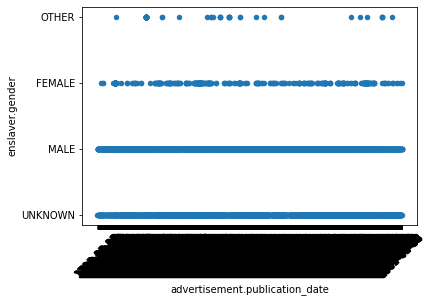

In [124]:
test = testing_module.where((fotm['advertisement.publication_date'] >='1700') & (fotm['advertisement.publication_date'] <= '1750')).dropna()
fotm.plot(x = 'advertisement.publication_date',
          y='enslaver.gender',
          #s = 'runaway_reward.amount',
          kind = 'scatter',
          rot = 45)

In [113]:
testing_module.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621 entries, 61 to 1002
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   advertisement.publication_date  621 non-null    object 
 1   advertisement.complete          621 non-null    float64
 2   enslaved_person.gender          621 non-null    object 
 3   enslaver.gender                 621 non-null    object 
 4   enslaver.type                   621 non-null    object 
 5   newspaper.name                  621 non-null    object 
 6   runaway_reward.amount           621 non-null    float64
 7   newspaper_location.city         621 non-null    object 
 8   newspaper_location.state        621 non-null    object 
dtypes: float64(2), object(7)
memory usage: 48.5+ KB


<AxesSubplot:xlabel='newspaper.name'>

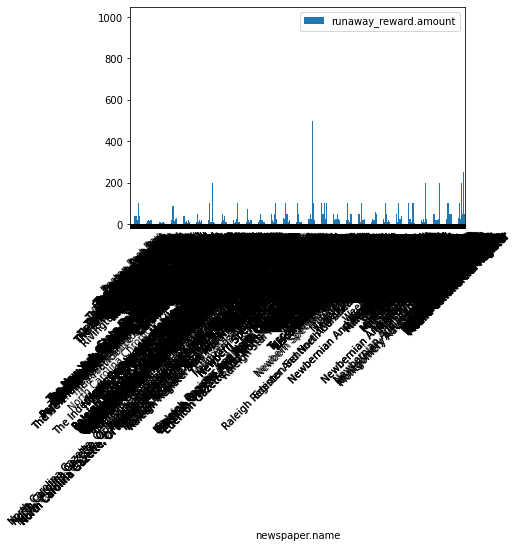

In [133]:
#test = testing_module.where((fotm['advertisement.publication_date'] >='1751') & (fotm['advertisement.publication_date'] <= '1800')).dropna()

fotm_less_than_2000.plot(x = 'newspaper.name',
          y='runaway_reward.amount',
          kind = 'bar',
          rot = 45)

In [ ]:
test = testing_module.where((fotm['advertisement.publication_date'] >='1801') & (fotm['advertisement.publication_date'] <= '1850')).dropna()
test


In [ ]:
testing_module.plot(x = 'advertisement.publication_date',
          y='enslaver.gender',
          #s = 'runaway_reward.amount',
          kind = 'scatter',
          rot = 45)

In [ ]:
test

In [ ]:
test = testing_module.where((fotm['advertisement.publication_date'] >='1851') & (fotm['advertisement.publication_date'] <= '1867')).dropna()

test.plot(x = 'advertisement.publication_date',
          y='enslaver.gender',
          #s = 'runaway_reward.amount',
          kind = 'scatter',
          rot = 45)

In [ ]:
test = fotm.where((fotm['advertisement.publication_date'] >='1700') & (fotm['advertisement.publication_date'] <= '1750')).dropna()

In [ ]:
import matplotlib.pyplot as plt

fotm.plot(x = 'advertisement.publication_date',
       y = 'runaway_reward.amount',
          kind= 'scatter',
         figsize = (35,15)
         )



## Visualization using Seaborn 

 This is going to be your best friend```df.loc[df['column_name'] == value]```
 
 

In [ ]:
sns.catplot(x = 'runaway_reward.amount',
         y = 'newspaper_location.state',
        data = fotm)

In [ ]:
sns.catplot(x = 'runaway_reward.amount',
         y = 'enslaver.type',
        data = fotm)

In [ ]:
plt.figure(figsize=(20,5))
x = sns.catplot(#x = 'enslaver.type',
        x = 'runaway_reward.amount',
        #hue = 'enslaver.gender',
            kind="count",
        orient = 'h',
        col="advertisement.complete",
        data = fotm,
       )#.loc[fotm['advertisement.complete'] == True])
x.set_xticklabels(rotation=90)



## Exploring The Boston News-Letter Newspaper 

In [ ]:
Boston_Letter_Df = fotm_dataset_modified.loc[fotm_dataset_modified['newspaper.name'] == 'The Boston News-Letter']
#Boston_Letter_Df = fotm_dataset_modified.loc[fotm_dataset_modified['runaway_reward.amount'] > 0.0]
Boston_Letter_Df

In [ ]:
sns.catplot(x = 'enslaver.type',
        y = 'runaway_reward.amount',
        hue = 'advertisement.complete',
        data = Boston_Letter_Df)

## Looking at a State

In [ ]:
Boston_Letter_Df = fotm_dataset_modified.loc[fotm_dataset_modified['newspaper.name'] == 'US-LA']
#Boston_Letter_Df = fotm_dataset_modified.loc[fotm_dataset_modified['runaway_reward.amount'] > 0.0]
Boston_Letter_Df